# K-Means Clustering

K-means clustering is one of the simplest unsupervised machine learning algorithms.group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data= pd.read_csv('D:/ShakthiSai -Keerthana Learnings/AI and Machine Learning/Clustering/datasets_42674_74935_Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
X= data.iloc[:, [3,4]].values ## take 2 features- income and score

In [8]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## K-Means

In [9]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=5)
Kmean.fit(X)

KMeans(n_clusters=5)

In [10]:
Kmean.cluster_centers_   ## value of centriods

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

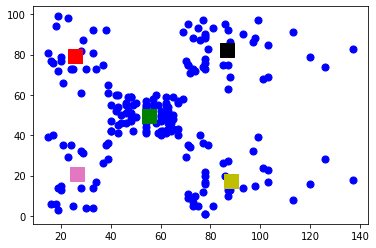

In [11]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(55.2962963 , 49.51851852, s=200, c='g', marker='s')
plt.scatter(25.72727273, 79.36363636, s=200, c='r', marker='s')
plt.scatter(86.53846154, 82.12820513, s=200, c='k', marker='s')
plt.scatter(88.2       , 17.11428571, s=200, c='y', marker='s')
plt.scatter(26.30434783, 20.91304348, s=200, c='#e377c2', marker='s')
plt.show()

In [12]:
Kmean.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

## Elbow method to find optimal value of K

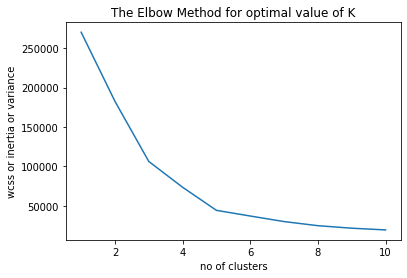

In [15]:
# KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
# to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
# inertia_ is the formula used to segregate the data points into clusters
### Static code to get max no of clusters

## within-cluster sum of squares (WCSS) (i.e. variance) or inertia.
## Inertia is the sum of squared error for each cluster. Therefore the smaller the inertia the denser the cluster
##  to find "k", we use the value of inertia. 
## we have to minimize the variance

wcss=[]    
for k in range(1,11):
    kmeans = KMeans(n_clusters= k, init='k-means++', random_state=0)  ## default is k-means++ so no need to mention it
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    #Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method for optimal value of K')
plt.xlabel('no of clusters')
plt.ylabel('wcss or inertia or variance')
plt.show()

In [14]:
## The value of inertia decreases as the number of clusters increase. So, its a trade-off here. 
## Rule of thumb: The elbow point in the inertia graph is a good choice because after that the change in the value of inertia isn’t significant.
##last elbow comes at k=5
## we usually prefer range (1,11)
##Finally we got that k=5

In [40]:
## Model building with updated K value

In [41]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [ ]:
#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"

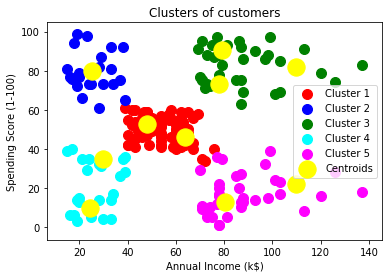

In [42]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()